In [30]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.integrate import odeint


In [31]:
data_dir = '../data'
hospital_latest = pd.read_csv(os.path.join(data_dir, 'donnees-hospitalieres-covid19-2020-05-05-19h00.csv'),
                              sep=';')
age_metadata = pd.read_csv(os.path.join(data_dir, 'code-tranches-dage.csv'),
                              sep=';')
hospital_metadata = pd.read_csv(os.path.join(data_dir, 'metadonnees-donnees-hospitalieres-covid19.csv'),
                              sep=';')
emr_sos_latest = pd.read_csv(os.path.join(data_dir, 'sursaud-covid19-hebdomadaire-2020-04-29-19h00.csv'),
                             sep=';')
gender_metadata = pd.read_csv(os.path.join(data_dir, 'metadonnees-sexe.csv'),
                              sep=';')

In [32]:
hospital_latest.describe()

,sexe,hosp,rea,rad,dc
count,14850.000000,14850.000000,14850.000000,14850.000000,14850.000000
mean,1.000000,157.342357,31.414074,167.986465,55.095825
std,0.816524,300.362171,64.017471,335.232762,120.594982
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.000000,3.000000,15.000000,3.000000
50%,1.000000,52.000000,10.000000,50.000000,14.000000
75%,2.000000,142.000000,29.000000,161.000000,47.000000
max,2.000000,3281.000000,855.000000,4341.000000,1542.000000


In [33]:
emr_sos_latest.describe()

,Nbre_pass_Corona,Nbre_pass_tot,Nbre_hospit_Corona,Nbre_acte_corona,Nbre_acte_tot
count,4884.000000,4884.000000,4884.000000,2208.000000,2208.000000
mean,53.308763,641.670147,21.668509,40.079710,405.353261
std,141.920431,997.559625,53.439205,94.967459,672.543136
min,0.000000,1.000000,0.000000,0.000000,4.000000
25%,2.000000,151.750000,0.000000,2.000000,75.000000
50%,13.000000,311.000000,4.000000,9.000000,176.500000
75%,48.000000,690.000000,20.000000,36.000000,445.250000
max,3598.000000,13483.000000,1073.000000,1563.000000,8074.000000


In [34]:
hospital_metadata[['Colonne', 'Description_FR']]

,Colonne,Description_FR
0,dep,Département
1,sexe,Sexe
2,jour,Date de notification
3,hosp,Nombre de personnes actuellement hospitalisées
4,rea,Nombre de personnes actuellement en réanimatio...
5,rad,Nombre cumulé de personnes retournées à domicile
6,dc,Nombre cumulé de personnes décédées à l'hôpital


In [50]:
aggr_hospital_latest=hospital_latest.groupby(['jour']).sum()
aggr_hospital_latest.drop(['sexe'],axis=1,inplace=True)
aggr_hospital_latest.head()

,hosp,rea,rad,dc
jour,,,,
2020-03-18,5905,1535,1627,435
2020-03-19,7961,1975,2322,642
2020-03-20,10272,2564,3128,890
2020-03-21,11599,2872,3580,1041
2020-03-22,13675,3311,4188,1251


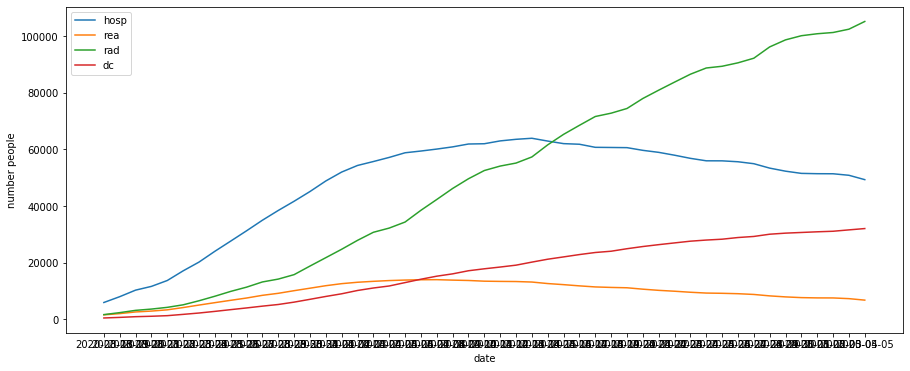

In [71]:
plt.figure(figsize=(15,6))
plt.plot(aggr_hospital_latest['hosp'])
plt.plot(aggr_hospital_latest['rea'])
plt.plot(aggr_hospital_latest['rad'])
plt.plot(aggr_hospital_latest['dc'])
plt.legend(aggr_hospital_latest)
plt.ylabel('number people')
plt.xlabel('date')
plt.show()

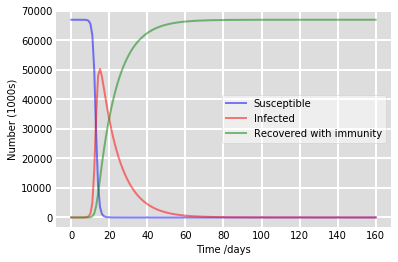

In [37]:


# Total population France, N.
N = 67000000

# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0

# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0

# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 1.5, 1./10 

# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()